In [ ]:
Josh Gilkinson Week 7 Assignment


In [ ]:
Exercise 7.1

In [2]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/brfss.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/CDBRFS08.ASC.gz")
import brfss

df = brfss.ReadBrfss()

In [3]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz"
)
import first

live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

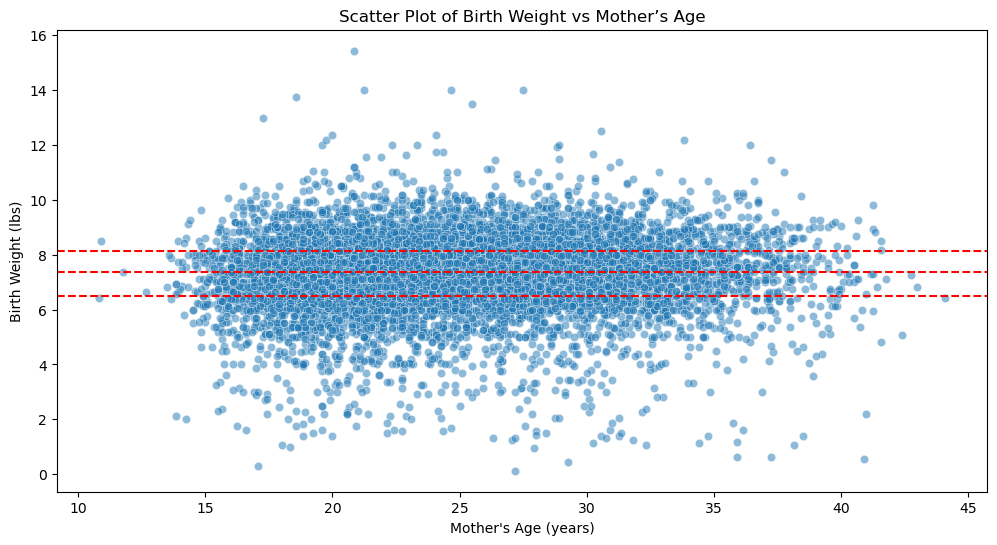

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
import numpy as np

plt.figure(figsize=(12, 6))
sns.scatterplot(x='agepreg', y='totalwgt_lb', data=live, alpha=0.5)
plt.title('Scatter Plot of Birth Weight vs Mother’s Age')
plt.xlabel("Mother's Age (years)")
plt.ylabel('Birth Weight (lbs)')

percentiles = np.percentile(live['totalwgt_lb'].dropna(), [25, 50, 75])
for p in percentiles:
    plt.axhline(y=p, color='r', linestyle='--')

plt.show()


In [13]:
#Pearson's Correlation
pearson_corr, _ = pearsonr(live['agepreg'], live['totalwgt_lb'])
print(f"Pearson's Correlation: {pearson_corr:.3f}")

Pearson's Correlation: 0.069


In [12]:
#Spearman's Correlation
spearman_corr, _ = spearmanr(live['agepreg'], live['totalwgt_lb'])
print(f"Spearman's Correlation: {spearman_corr:.3f}")

Spearman's Correlation: 0.095


In [ ]:
For Pearson's Correlation, the correlation is slightly positive since it's a little over half way to 1, for Spearman's it is a strong correlation. 

In [ ]:
Exercise 8.1

In [9]:
import numpy as np
from scipy.stats import norm

np.random.seed(42)

def simulate_mean_median(n, num_simulations=1000):
    true_mean = 10 
    true_std = 2    

    mse_mean = 0
    mse_median = 0

    for _ in range(num_simulations):
        data = np.random.normal(true_mean, true_std, n)

        mean_estimate = np.mean(data)
        median_estimate = np.median(data)

        true_values = np.full(n, true_mean)

        mse_mean += np.mean((mean_estimate - true_values)**2)
        mse_median += np.mean((median_estimate - true_values)**2)

    mse_mean /= num_simulations
    mse_median /= num_simulations

    return mse_mean, mse_median

def simulate_variance(n, num_simulations=1000):
    true_variance = 4  # True population variance

    mse_variance = 0
    mse_unbiased_variance = 0

    for _ in range(num_simulations):
        data = np.random.normal(0, np.sqrt(true_variance), n)

        variance_estimate = np.var(data)
        unbiased_variance_estimate = np.var(data, ddof=1)

        true_values = np.full(n, true_variance)

        mse_variance += np.mean((variance_estimate - true_values)**2)
        mse_unbiased_variance += np.mean((unbiased_variance_estimate - true_values)**2)

    mse_variance /= num_simulations
    mse_unbiased_variance /= num_simulations

    return mse_variance, mse_unbiased_variance

sample_sizes = [10, 20, 30]

for n in sample_sizes:
    mse_mean, mse_median = simulate_mean_median(n)
    print(f"Sample Size: {n}")
    print(f"MSE for Mean Estimate: {mse_mean}")
    print(f"MSE for Median Estimate: {mse_median}")
    print()

for n in sample_sizes:
    mse_variance, mse_unbiased_variance = simulate_variance(n)
    print(f"Sample Size: {n}")
    print(f"MSE for Variance Estimate: {mse_variance}")
    print(f"MSE for Unbiased Variance Estimate: {mse_unbiased_variance}")
    print()


Sample Size: 10
MSE for Mean Estimate: 0.3940179100786896
MSE for Median Estimate: 0.5349430534570813

Sample Size: 20
MSE for Mean Estimate: 0.1910775073372613
MSE for Median Estimate: 0.267823468489209

Sample Size: 30
MSE for Mean Estimate: 0.14382073641836196
MSE for Median Estimate: 0.2158576087811367

Sample Size: 10
MSE for Variance Estimate: 2.750383307557394
MSE for Unbiased Variance Estimate: 3.1228439684294846

Sample Size: 20
MSE for Variance Estimate: 1.542589106730127
MSE for Unbiased Variance Estimate: 1.6740980105418264

Sample Size: 30
MSE for Variance Estimate: 1.0149496568228937
MSE for Unbiased Variance Estimate: 1.0699993030811925



In [ ]:
Exercise 8.2

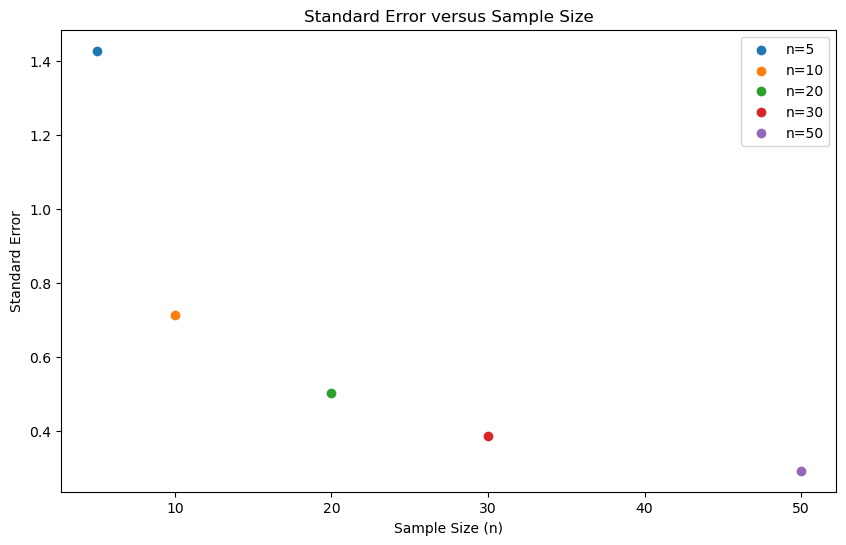

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
from scipy.stats import norm

np.random.seed(42)

def simulate_experiment(n, num_simulations=1000):
    # Parameters of the exponential distribution
    true_lambda = 2

    estimates = np.zeros(num_simulations)

    for i in range(num_simulations):
        data = np.random.exponential(scale=1/true_lambda, size=n)

        lambda_estimate = 1 / np.mean(data)

        estimates[i] = lambda_estimate

    return estimates

sample_sizes = [5, 10, 20, 30, 50]

plt.figure(figsize=(10, 6))

for n in sample_sizes:
    estimates = simulate_experiment(n)

    se = np.std(estimates, ddof=1)  # ddof=1 for sample standard deviation

    plt.scatter(n, se, label=f'n={n}')

plt.xlabel('Sample Size (n)')
plt.ylabel('Standard Error')
plt.title('Standard Error versus Sample Size')
plt.legend()
plt.show()


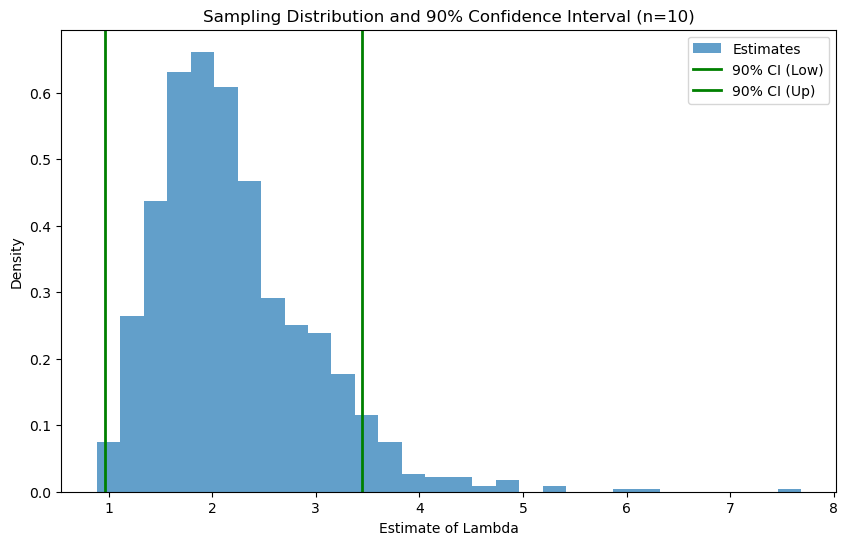

In [11]:
def simulate_experiment_ci(n, num_simulations=1000, confidence_level=0.90):
    true_lambda = 2

    estimates = np.zeros(num_simulations)

    for i in range(num_simulations):
        data = np.random.exponential(scale=1/true_lambda, size=n)

        lambda_estimate = 1 / np.mean(data)

        estimates[i] = lambda_estimate

    lower_ci, upper_ci = norm.interval(confidence_level, loc=np.mean(estimates), scale=np.std(estimates, ddof=1))

    return estimates, lower_ci, upper_ci

n_example = 10
estimates_example, lower_ci_example, upper_ci_example = simulate_experiment_ci(n_example)

plt.figure(figsize=(10, 6))
plt.hist(estimates_example, bins=30, density=True, alpha=0.7, label='Estimates')
plt.axvline(lower_ci_example, color='green', linestyle='solid', linewidth=2, label='90% CI (Low)')
plt.axvline(upper_ci_example, color='green', linestyle='solid', linewidth=2, label='90% CI (Up)')
plt.xlabel('Estimate of Lambda')
plt.ylabel('Density')
plt.title(f'Sampling Distribution and 90% Confidence Interval (n={n_example})')
plt.legend()
plt.show()
